# BodyPix React App 

1. Install dependencies
  - `tensorflow.js` (https://github.com/tensorflow/tfjs-models/tree/master/deeplab)
  - `BodyPix`
  - `webcam.js` (https://www.npmjs.com/package/react-webcam)
2. Import dependencies
3. Setup webcam and canvas
4. Define references to those
5. Load handpose
6. Detect function
7. Draw using drawMask - draw on canvas


**References**  
- Nicholas Renotte (2020) Real Time Body Segmentation Tutorial with Tensorflow.JS and React.JS 
  https://www.youtube.com/watch?v=KAaXbGr9o0s&t=147s&ab_channel=NicholasRenotte

## 1 - Install dependencies

In [ ]:
npm install @tensorflow/tfjs @tensorflow-models/body-pix react-webcam

        added 35 packages, and audited 1984 packages in 5m

        154 packages are looking for funding
        run `npm fund` for details        

        58 vulnerabilities (16 moderate, 40 high, 2 critical)

        To address issues that do not require attention, run:
        npm audit fix

        To address all issues (including breaking changes), run:
        npm audit fix --force

        Run `npm audit` for details.

In [ ]:
# package.json
{
  "name": "bodypix-react",
  "version": "0.1.0",
  "private": true,
  "dependencies": {
    "@tensorflow-models/body-pix": "^2.2.0",    # installed 
    "@tensorflow/tfjs": "^3.11.0",              # installed 
    "@testing-library/jest-dom": "^5.15.0",
    "@testing-library/react": "^11.2.7",
    "@testing-library/user-event": "^12.8.3",
    "react": "^17.0.2",
    "react-dom": "^17.0.2",
    "react-scripts": "4.0.3",
    "react-webcam": "^6.0.0",                   # installed 
    "web-vitals": "^1.1.2"
  },

In [ ]:
# then start app
npm start

## 2 - Import dependencies
- `"@tensorflow/tfjs"`: 
- `"@tensorflow-models/body-pix"`
- `"react-webcam"`

In [ ]:
import React, {userRef} from "react";     # used when referring to on-screen or DOM elements.
import * as tf from "@tensorflow/tfjs";     
import * as bodyPix from "@tensorflow-models/body-pix";
import Webcam from "react-webcam";
import './App.css';

## 3 - Setup webcam and canvas

## 4 - Define references to those


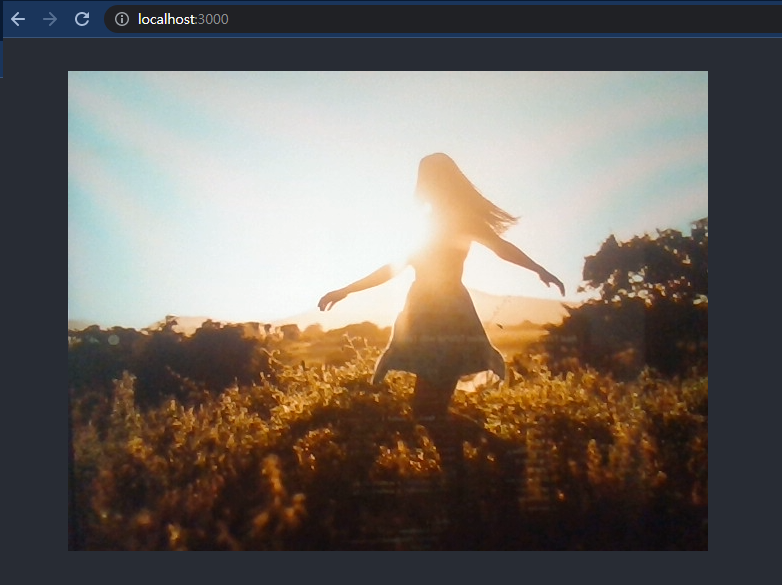

In [2]:
function App() {
  const webcamRef = useRef(null);
  const canvasRef = useRef(null);
  
  return (
    <div className="App">
      <header className="App-header">

        <Webcam 
          ref={webcamRef}
          style = {{
            position: "absolute",
            marginLeft: "auto",
            marginRight: "auto",
            left:0,
            right:0,
            textAlign:"center",
            zIndex:9,
            width:640,
            height:480
          }} />

        <canvas ref={canvasRef}
          style = {{
            position: "absolute",
            marginLeft: "auto",
            marginRight: "auto",
            left:0,
            right:0,
            textAlign:"center",
            zIndex:9,
            width:640,
            height:480
        }} />

      </header>
    </div>
  );
}

export default App;

## 5 - Load `bodypix`
`BodyPix` model loads a pre-trained `tensorflow.js` model. 

In [ ]:
Javascript("""

function App() {
  const webcamRef = useRef(null);
  const canvasRef = useRef(null);

  // Load boxypix model. 
  const runBodysegment = async () => {  
    const net = await bodyPix.load();     // helps access the pre-trained neural network via the net variable
    console.log("Bodypix model loaded.")
  }

  runBodysegment();

  ...

""")

## 6 - Detect function
Loops the images at a near-real-time speed. 
- Create a new function `detect` which:
  - checks if data is available
  - gets video properties
  - sets video width and height
  - sets canvas width and height
  - make detections
  - draw detections
- See how generic `bodyPix` model and the pre-trained `net` model perform different roles. 
  - `net`: detects body parts based on its learning
  - `bodyPix`: draws on the detections performed by `net`.

## 7 - Draw using drawMask - draw on canvas

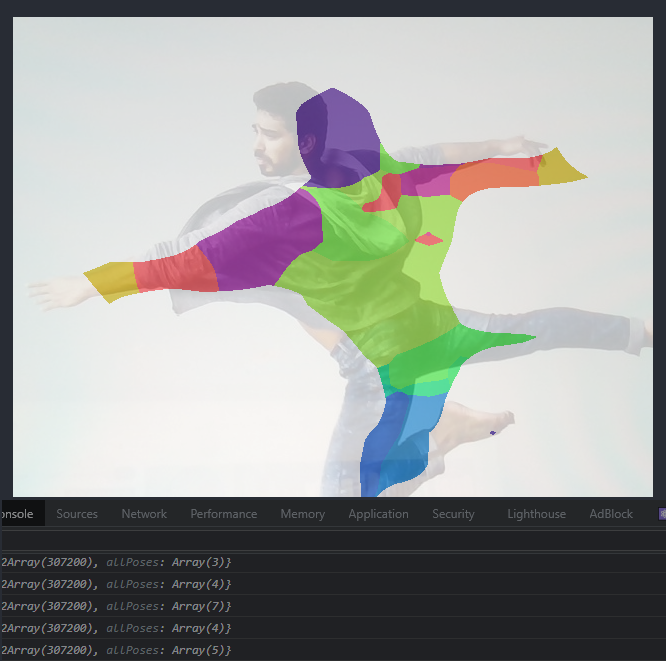

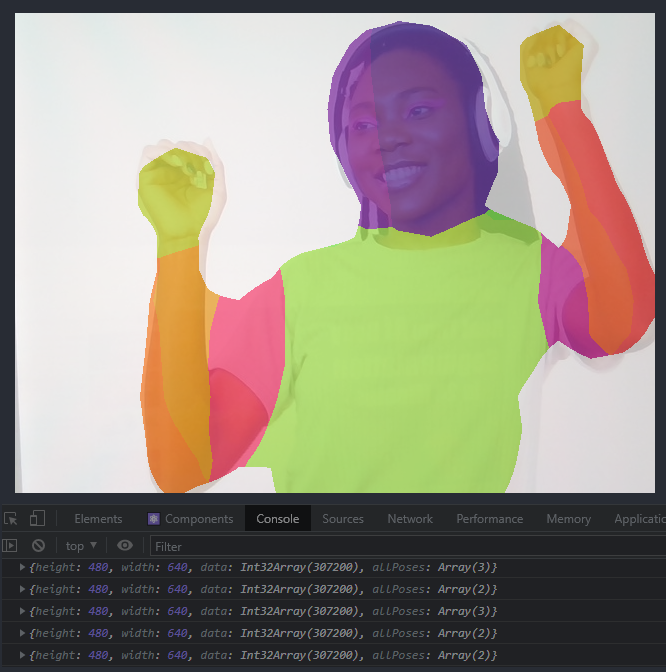

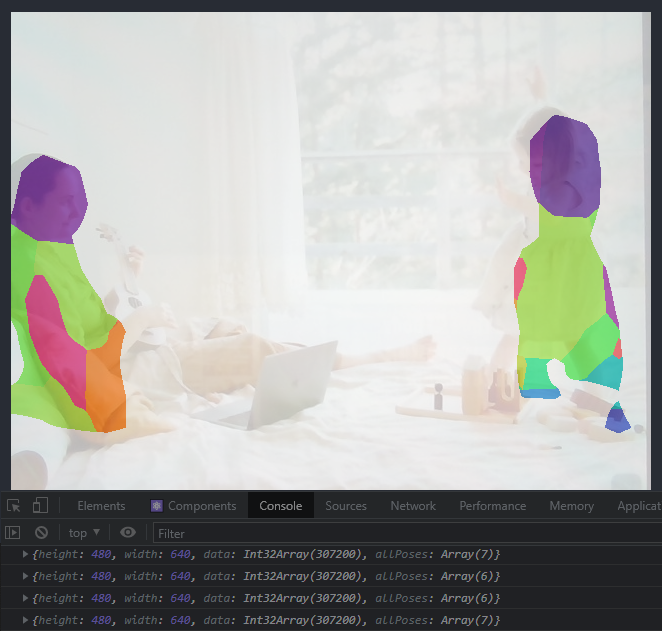

In [5]:
Javascript("""

function App() {
  const webcamRef = useRef(null);
  const canvasRef = useRef(null);

  const runBodysegment = async () => {
    const net = await bodyPix.load();       // Load the neural network.
    console.log("Bodypix model loaded.")
  }

  // detect function 
  const detect = async (net) => {
    // Check data availability
    if (
      typeof webcamRef.current !== "undefined" &&   // webcam is not undefined
      webcamRef.current !== null &&                 // webcam is not null
      webcamRef.current.video.readyState === 4      // webcam is receiving data
    ) {
    
      // Get video properties
      const video = webcamRef.current.video;    // get current video data.
      const videoHeight = video.videoHeight;    // extract height by accessing the video variable.
      const videoWidth = video.videoWidth;      // extract width.

      // fore-set video width and height for canvas 
      // so that the canvas is of the same size as webcam.
      webcamRef.current.video.width = videoWidth;
      webcamRef.current.video.height = videoHeight;

      // Set canvas width and height
      canvasRef.current.width = videoWidth;
      canvasRef.current.height = videoHeight;

      // Make detections
      // Various functions = .segmentPerson; .segmentPersonParts; .segmentMultiPersons; .segmentMultiPersonParts;
      const person = await net.segmentPersonParts(video);   // grab the network and call the segmentation funciton. 
      console.log(person);

      // Draw detections
      const coloredPartImage = bodyPix.toColoredPartMask(person); // colored part representations (mask)

      bodyPix.drawMask(
        canvasRef.current,
        video,
        coloredPartImage, // passed in as a mask. 
        0.7, 0, false
      );

    }
  };

  runBodysegment();

  ...

""")